In [1]:
import dill
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with open("HDP_models_traces.pkl", "rb") as f:
    models, traces, datasets, a_all, b_all = dill.load(f)

RANDOM_SEED = 42

In [7]:
def summary_HDP(trace, model, N_sources=1, k=1):
    """
    Summarize and visualize the HDP model results.

    :param trace: Trace of the model
    :param model: The model being summarized
    :param N_sources: Number of sources
    :param k: Number of components for the model
    :return: None
    """
    # Variable names to summarize
    var_names = ["α", "β", "σ", "gamma", "alpha0", "beta"]
    # Add π_norm for each source
    for s in range(N_sources):
        var_names.append(f"pi_{s}")
        var_names.append(f"pi_norm_{s}")
    
    # Print summary of the trace
    print(az.summary(trace, var_names=var_names))
    print("Trace summary completed.")

    # Plot trace and posterior distributions
    az.plot_trace(trace, var_names=["α", "β", "σ", "gamma", "alpha0", "beta"])
    plt.show()

    with model:
        posterior_predictive = pm.sample_posterior_predictive(trace, random_seed=RANDOM_SEED)
    
    
    
    #az.plot_posterior(trace, var_names=["α", "β", "σ", "gamma", "alpha0", "beta"])
    #plt.show()
    
    # Assuming 'idata' is your InferenceData object
    az.plot_ppc(posterior_predictive, num_pp_samples=100)
    
    # Set x-axis range
    plt.xlim(-500, 500)
    
    # Show the plot
    plt.show()

    az.plot_ppc(posterior_predictive, num_pp_samples=1000)
    plt.show()

    # Bar plot of posterior expected mixture weights
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_w = np.arange(k) + 1  # Component indices
    for s in range(N_sources):
        weights = trace.posterior[f"pi_norm_{s}"].mean(("chain", "draw"))
        ax.bar(
            plot_w - 0.5 + s * 0.1,  # Offset for sources
            weights,
            width=0.1, label=f"Source {s + 1}",
        )
    
    ax.set_xlim(0.5, k + 0.5)
    ax.set_xlabel("Component")
    ax.set_ylabel("Posterior expected mixture weight")
    ax.legend(title="Sources")
    plt.show()

In [13]:
post_likelihoods = {}
for (ns, nc), (X, Y, proportions) in datasets.items():
    print(f"Running model for setting with {ns} sources and {nc} components.")
    print(f"True proportions for sources: {proportions}")
    print(f"True regression parameters (a, b): {a_all[nc - 2]}, {b_all[nc - 2]}")
    #summary_HDP(traces[(ns, nc)], models[(ns, nc)], N_sources=ns, k=nc)
    with models[(ns, nc)]:
        posterior_predictive = pm.sample_posterior_predictive(traces[(ns, nc)], random_seed=RANDOM_SEED)
        post_likelihoods[(ns, nc)] = posterior_predictive
        

Sampling: [likelihood_0, likelihood_1]


Output()

Running model for setting with 2 sources and 2 components.
True proportions for sources: [array([0.13487081, 0.86512919]), array([0.59055148, 0.40944852])]
True regression parameters (a, b): [0, 10], [5, 10]


Sampling: [likelihood_0, likelihood_1]


Output()

Running model for setting with 2 sources and 3 components.
True proportions for sources: [array([0.62356661, 0.14647413, 0.22995926]), array([0.25429755, 0.32555058, 0.42015187])]
True regression parameters (a, b): [0, 10, -10], [5, 10, 20]


Sampling: [likelihood_0, likelihood_1]


Output()

Running model for setting with 2 sources and 4 components.
True proportions for sources: [array([0.22232662, 0.52275785, 0.24218479, 0.01273073]), array([0.06099531, 0.13815446, 0.48488242, 0.31596781])]
True regression parameters (a, b): [0, 10, -10, 20], [5, 10, 20, -5]


Sampling: [likelihood_0, likelihood_1]


Output()

Running model for setting with 2 sources and 5 components.
True proportions for sources: [array([0.11371193, 0.22355182, 0.05567187, 0.09688174, 0.51018263]), array([0.35869015, 0.05369266, 0.04598725, 0.07349088, 0.46813907])]
True regression parameters (a, b): [0, 10, -10, 20, -20], [5, 10, 20, -5, 15]


Sampling: [likelihood_0, likelihood_1, likelihood_2]


Running model for setting with 3 sources and 2 components.
True proportions for sources: [array([0.75690651, 0.24309349]), array([0.88788855, 0.11211145]), array([0.06097223, 0.93902777])]
True regression parameters (a, b): [0, 10], [5, 10]


Output()

Sampling: [likelihood_0, likelihood_1, likelihood_2]


Running model for setting with 3 sources and 3 components.
True proportions for sources: [array([0.54521045, 0.00667315, 0.4481164 ]), array([0.07419834, 0.90431705, 0.02148462]), array([0.83508359, 0.06321972, 0.10169668])]
True regression parameters (a, b): [0, 10, -10], [5, 10, 20]


Output()

Sampling: [likelihood_0, likelihood_1, likelihood_2]


Running model for setting with 3 sources and 4 components.
True proportions for sources: [array([0.04527891, 0.67344355, 0.25825858, 0.02301896]), array([0.06319509, 0.33237044, 0.19762797, 0.4068065 ]), array([0.13838971, 0.4503975 , 0.08177024, 0.32944256])]
True regression parameters (a, b): [0, 10, -10, 20], [5, 10, 20, -5]


Output()

Running model for setting with 3 sources and 5 components.
True proportions for sources: [array([0.27854007, 0.02712406, 0.41190513, 0.06232285, 0.2201079 ]), array([0.11298119, 0.00525144, 0.35066366, 0.39817273, 0.13293099]), array([0.47987739, 0.13052273, 0.15639033, 0.02453157, 0.20867798])]
True regression parameters (a, b): [0, 10, -10, 20, -20], [5, 10, 20, -5, 15]


Sampling: [likelihood_0, likelihood_1, likelihood_2]


Output()

Running model for setting with 4 sources and 2 components.
True proportions for sources: [array([0.40141289, 0.59858711]), array([0.64477163, 0.35522837]), array([0.67747523, 0.32252477]), array([0.01891759, 0.98108241])]
True regression parameters (a, b): [0, 10], [5, 10]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3]


Output()

Running model for setting with 4 sources and 3 components.
True proportions for sources: [array([0.44983616, 0.05328343, 0.49688041]), array([1.28517486e-01, 6.79557593e-04, 8.70802957e-01]), array([0.48624438, 0.46416989, 0.04958573]), array([0.39128321, 0.25178869, 0.35692809])]
True regression parameters (a, b): [0, 10, -10], [5, 10, 20]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3]


Output()

Running model for setting with 4 sources and 4 components.
True proportions for sources: [array([0.21136006, 0.60083039, 0.07207479, 0.11573476]), array([0.06830296, 0.42807693, 0.24790098, 0.25571912]), array([0.1712881 , 0.15389517, 0.22520327, 0.44961347]), array([0.18761137, 0.02135999, 0.1808151 , 0.61021354])]
True regression parameters (a, b): [0, 10, -10, 20], [5, 10, 20, -5]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3]


Output()

Running model for setting with 4 sources and 5 components.
True proportions for sources: [array([0.21554773, 0.29975387, 0.41247076, 0.06736993, 0.00485771]), array([0.03491934, 0.04633474, 0.0104841 , 0.3532898 , 0.55497201]), array([0.25667358, 0.04326252, 0.19301137, 0.15217386, 0.35487866]), array([0.39106688, 0.18623654, 0.09851049, 0.09809197, 0.22609412])]
True regression parameters (a, b): [0, 10, -10, 20, -20], [5, 10, 20, -5, 15]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3]


Output()

Running model for setting with 5 sources and 2 components.
True proportions for sources: [array([0.85893856, 0.14106144]), array([0.8558379, 0.1441621]), array([0.7053934, 0.2946066]), array([0.19248047, 0.80751953]), array([0.92575378, 0.07424622])]
True regression parameters (a, b): [0, 10], [5, 10]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3, likelihood_4]


Output()

Running model for setting with 5 sources and 3 components.
True proportions for sources: [array([0.5013728, 0.2301656, 0.2684616]), array([0.87770443, 0.07747688, 0.04481869]), array([0.17067004, 0.64773186, 0.1815981 ]), array([0.37848661, 0.33306146, 0.28845193]), array([0.07557123, 0.62959293, 0.29483584])]
True regression parameters (a, b): [0, 10, -10], [5, 10, 20]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3, likelihood_4]


Output()

Running model for setting with 5 sources and 4 components.
True proportions for sources: [array([0.06808749, 0.140396  , 0.28039327, 0.51112324]), array([0.09898995, 0.23472609, 0.01458774, 0.65169621]), array([0.22329814, 0.25186951, 0.34045743, 0.18437492]), array([0.17864419, 0.6563327 , 0.14942215, 0.01560096]), array([0.03232526, 0.3852113 , 0.28442281, 0.29804063])]
True regression parameters (a, b): [0, 10, -10, 20], [5, 10, 20, -5]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3, likelihood_4]


Output()

Running model for setting with 5 sources and 5 components.
True proportions for sources: [array([0.35029953, 0.05868657, 0.30903387, 0.2803276 , 0.00165243]), array([0.17686442, 0.2307982 , 0.00062789, 0.10785112, 0.48385837]), array([0.42726726, 0.18767181, 0.24791614, 0.05113545, 0.08600933]), array([0.6717082 , 0.20672608, 0.00572769, 0.00703943, 0.10879859]), array([0.09935281, 0.05724953, 0.08203434, 0.67887524, 0.08248808])]
True regression parameters (a, b): [0, 10, -10, 20, -20], [5, 10, 20, -5, 15]


Sampling: [likelihood_0, likelihood_1, likelihood_2, likelihood_3, likelihood_4]


Output()

In [32]:
p_test_pred = {}

for (ns, nc), (X, Y, proportions) in datasets.items():
    print(f"Processing predictions for setting with {ns} sources and {nc} components.")
    predictions = {}
    
    # Extract posterior predictive samples for each likelihood
    posterior_predictive = post_likelihoods[(ns, nc)].posterior_predictive
    if posterior_predictive is None:
        print(f"No posterior predictive found for setting ({ns}, {nc}). Skipping.")
        continue
    
    for s in range(ns):
        likelihood_name = f"likelihood_{s}"
        if likelihood_name in posterior_predictive:
            # Compute mean predictions across chains and draws
            p_test_pred_source = posterior_predictive[likelihood_name].mean(dim=["chain", "draw"])
            predictions[likelihood_name] = p_test_pred_source
        else:
            print(f"Warning: {likelihood_name} not found in posterior predictive for setting ({ns}, {nc}).")
    
    p_test_pred[(ns, nc)] = predictions

# Output Summary of Predictions
    

Processing predictions for setting with 2 sources and 2 components.
Processing predictions for setting with 2 sources and 3 components.
Processing predictions for setting with 2 sources and 4 components.
Processing predictions for setting with 2 sources and 5 components.
Processing predictions for setting with 3 sources and 2 components.
Processing predictions for setting with 3 sources and 3 components.
Processing predictions for setting with 3 sources and 4 components.
Processing predictions for setting with 3 sources and 5 components.
Processing predictions for setting with 4 sources and 2 components.
Processing predictions for setting with 4 sources and 3 components.
Processing predictions for setting with 4 sources and 4 components.
Processing predictions for setting with 4 sources and 5 components.
Processing predictions for setting with 5 sources and 2 components.
Processing predictions for setting with 5 sources and 3 components.
Processing predictions for setting with 5 source


Plotting for setting with 2 sources and 2 components.


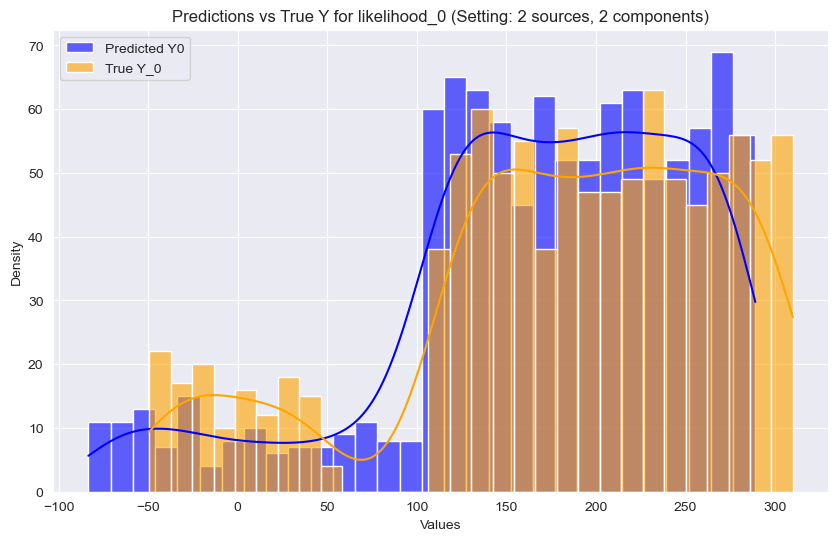

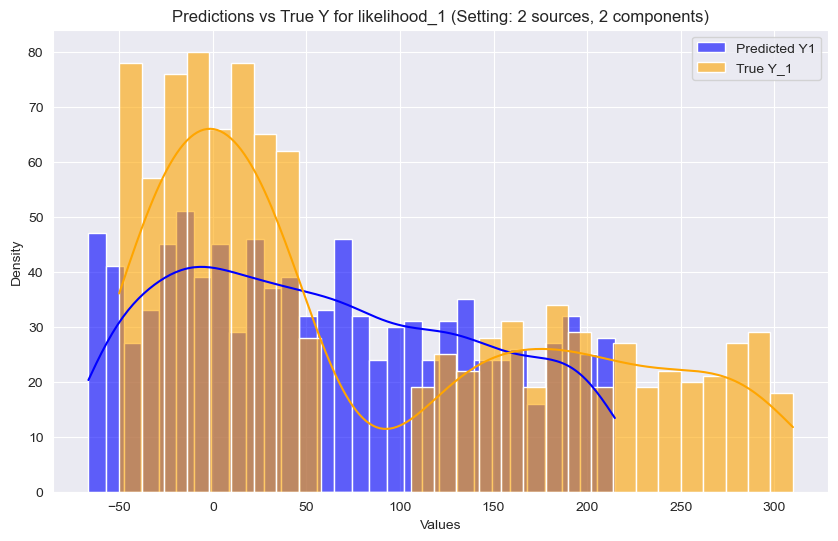


Plotting for setting with 2 sources and 3 components.


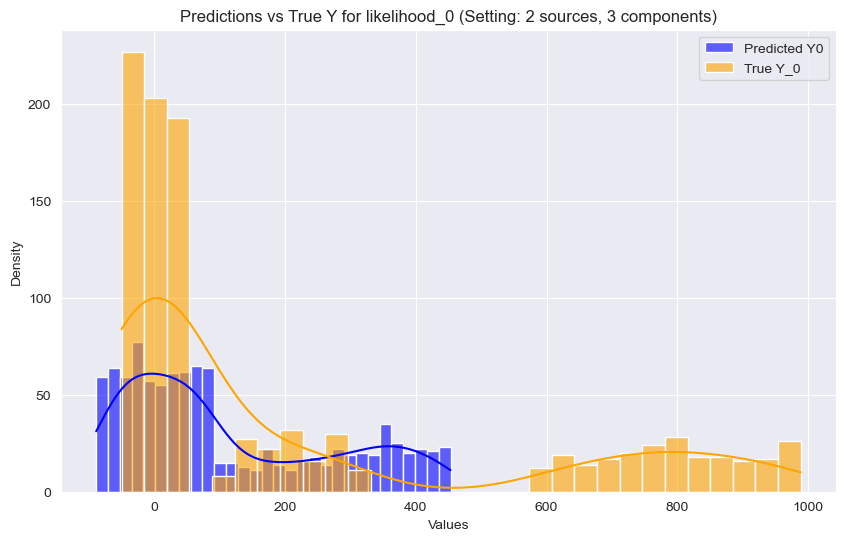

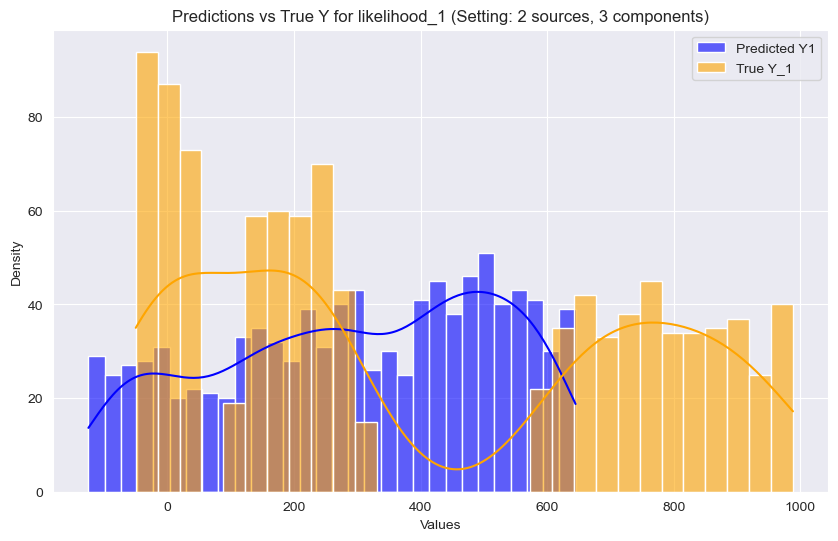


Plotting for setting with 2 sources and 4 components.


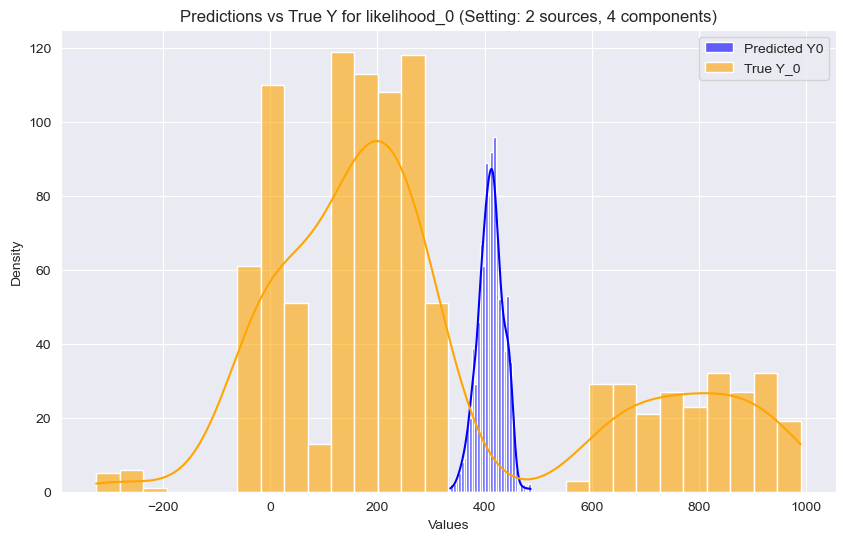

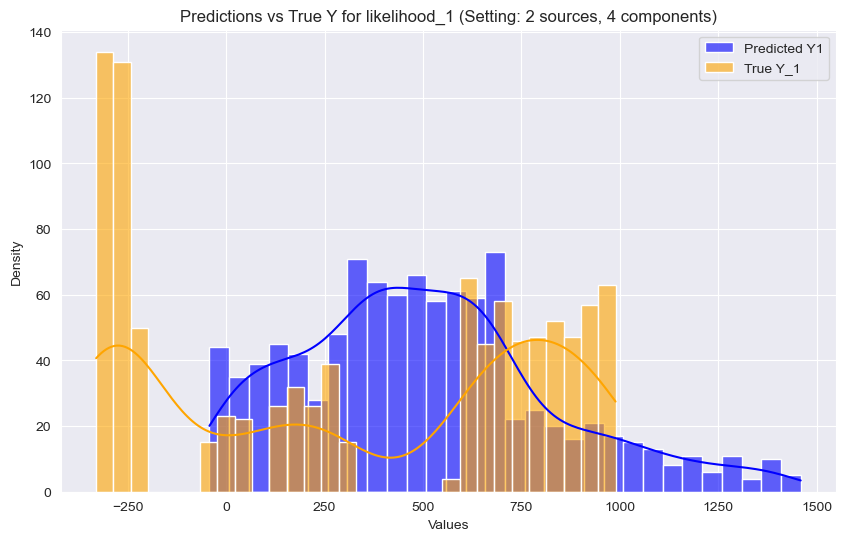


Plotting for setting with 2 sources and 5 components.


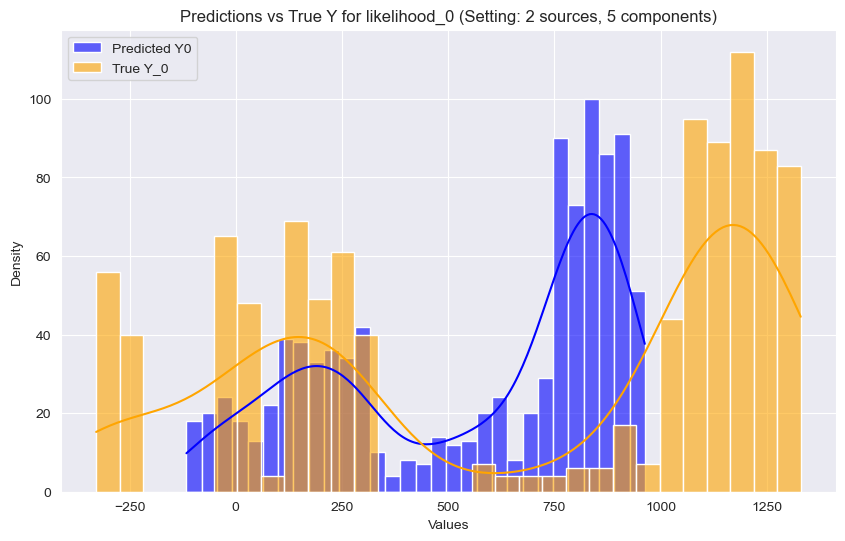

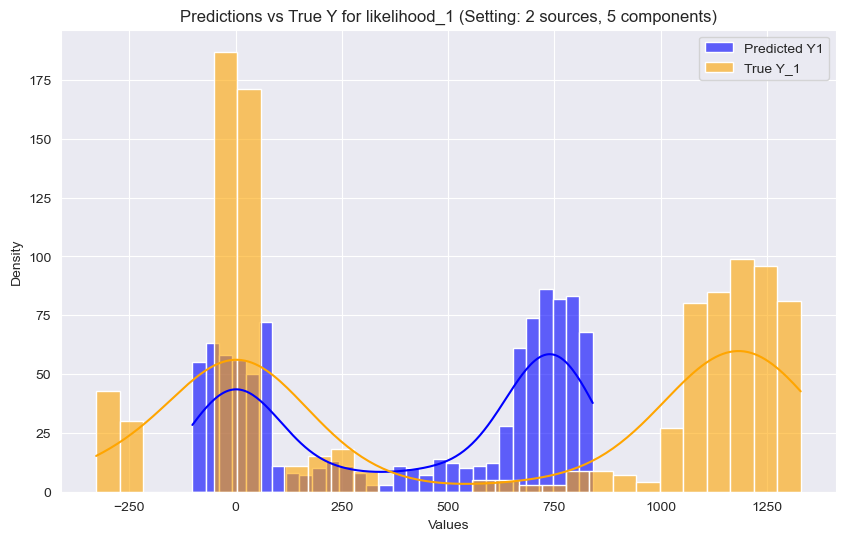


Plotting for setting with 3 sources and 2 components.


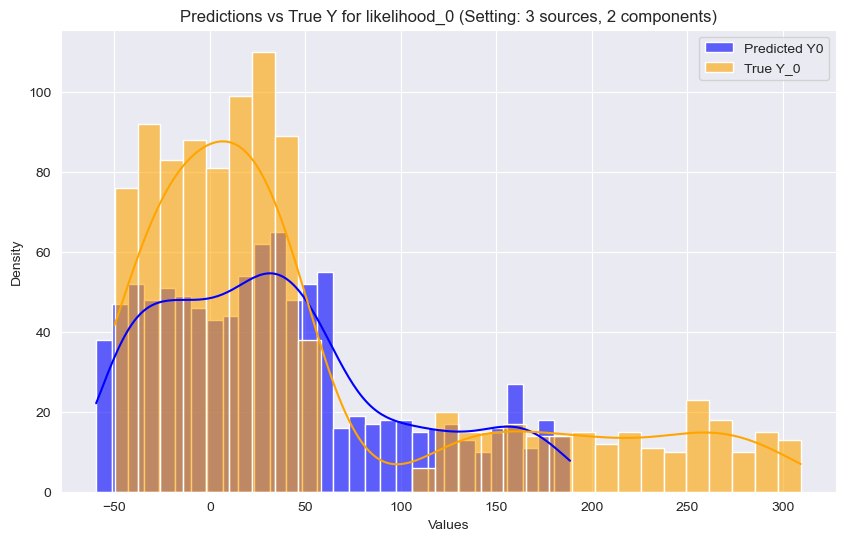

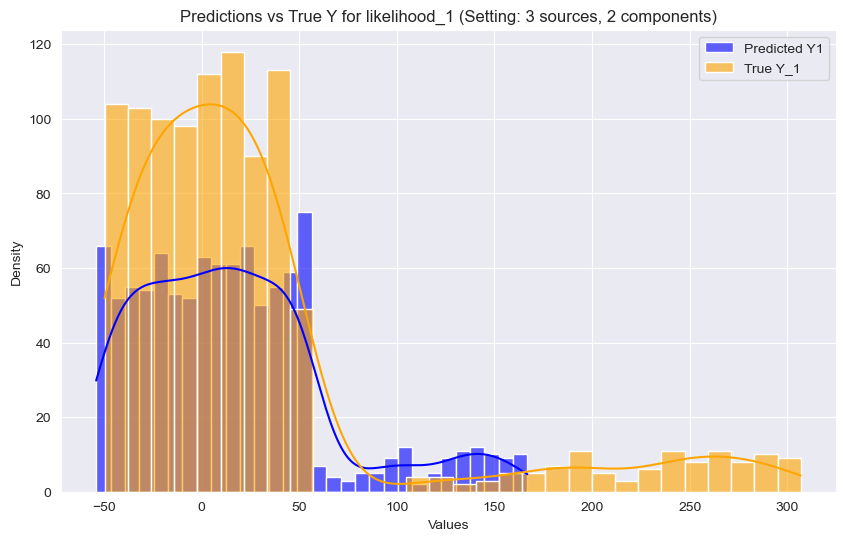

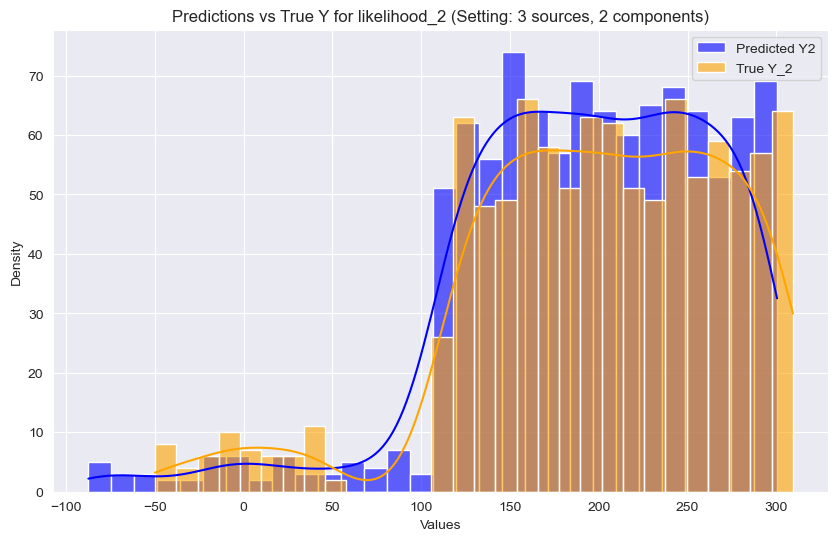


Plotting for setting with 3 sources and 3 components.


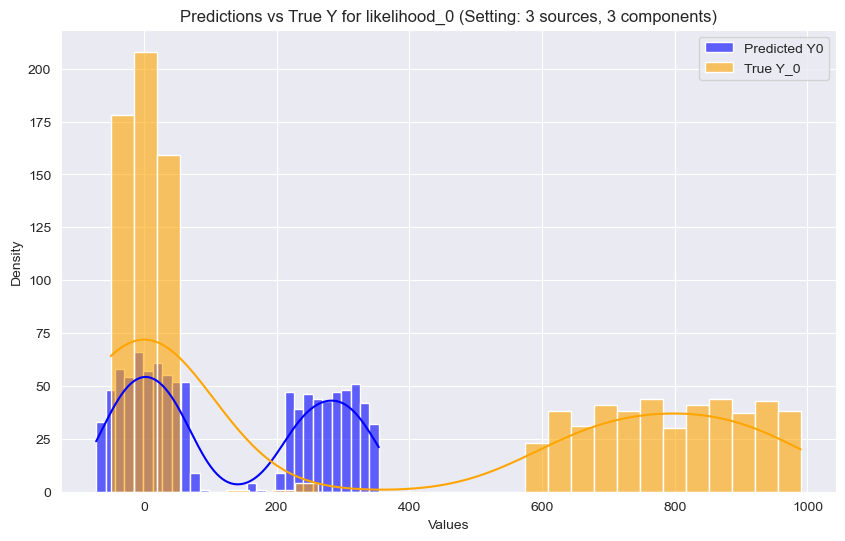

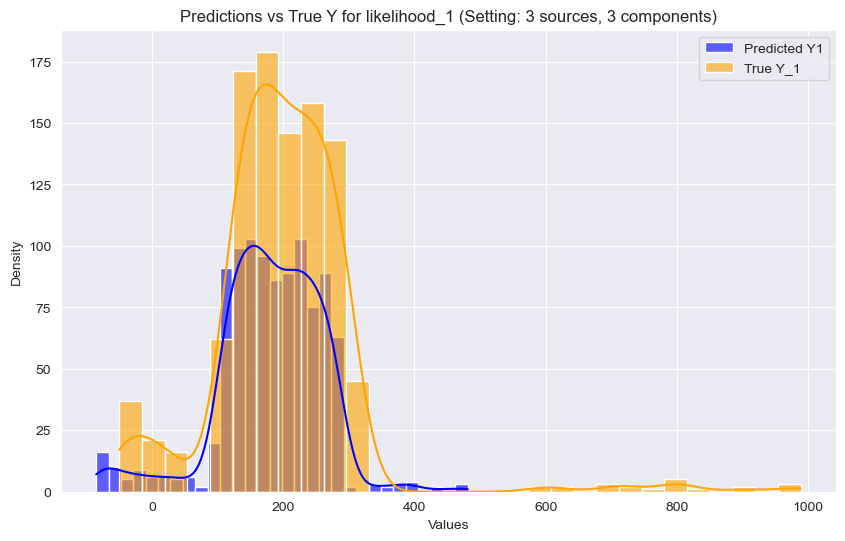

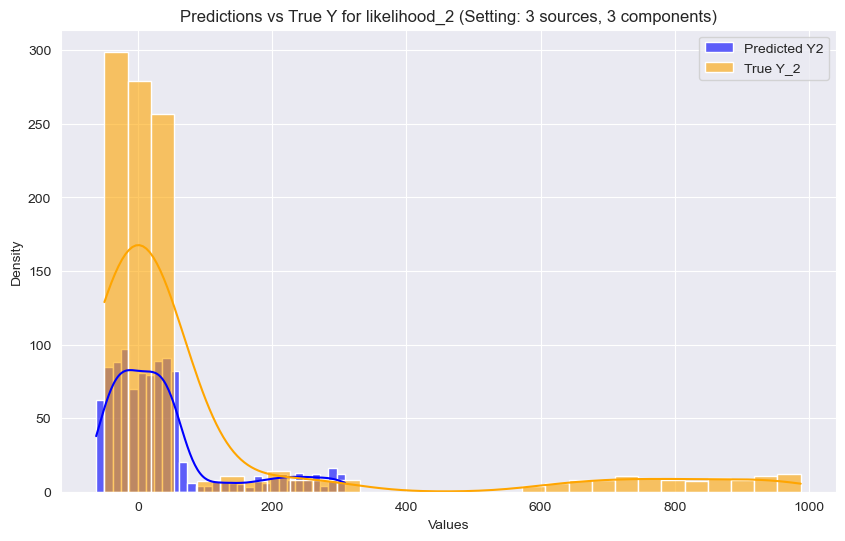


Plotting for setting with 3 sources and 4 components.


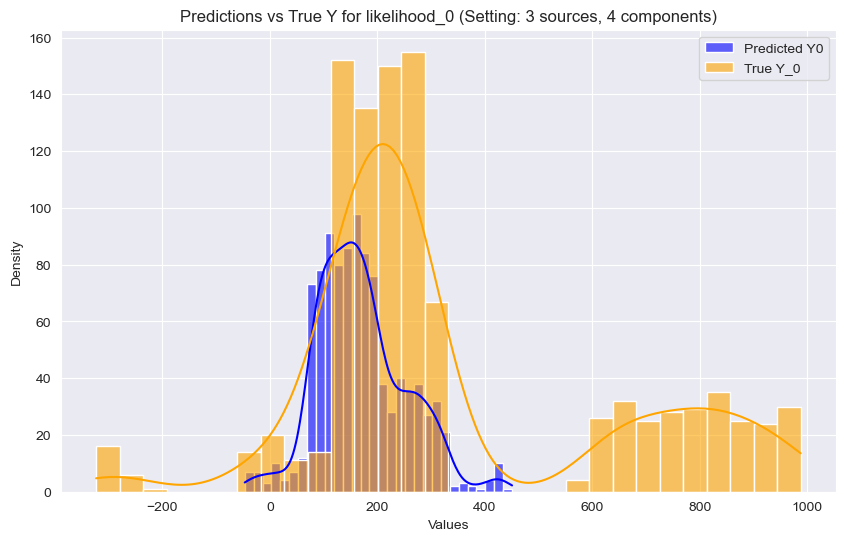

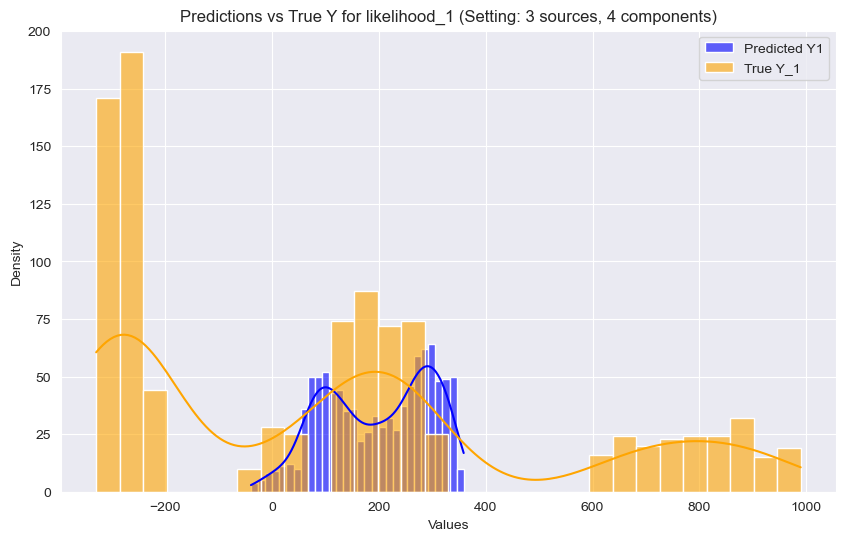

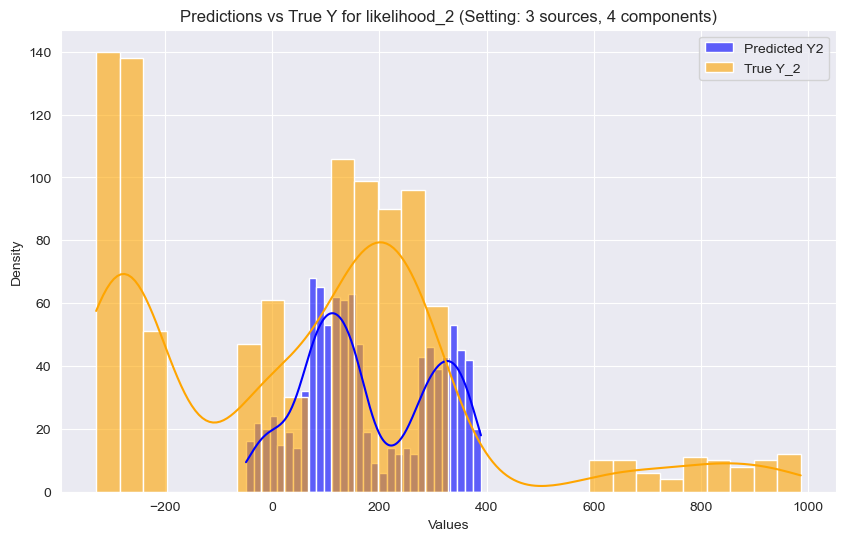


Plotting for setting with 3 sources and 5 components.


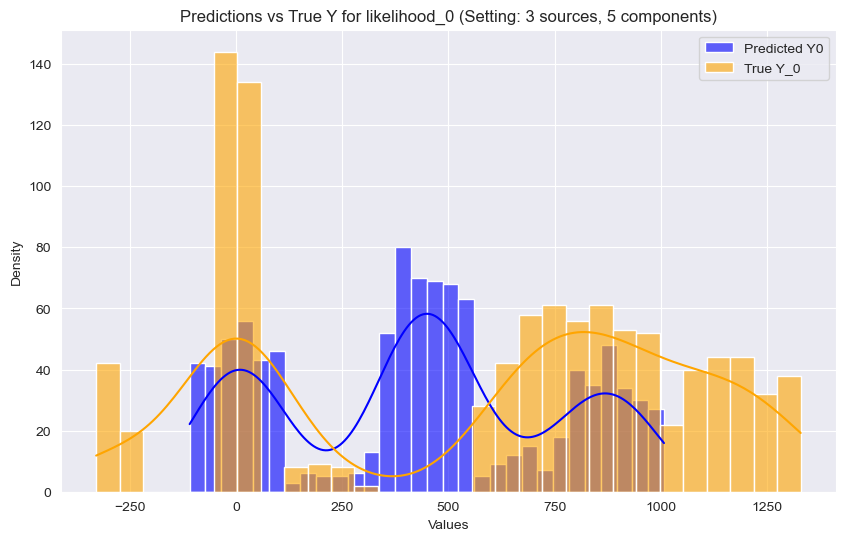

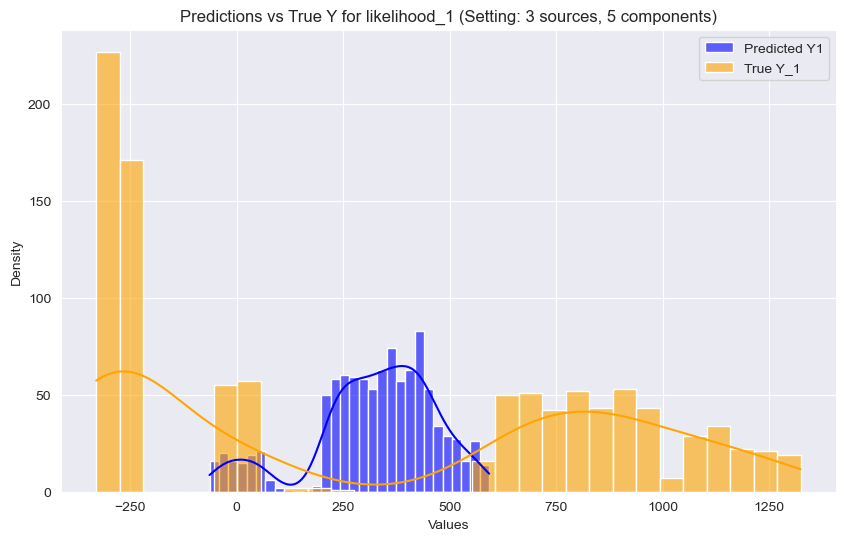

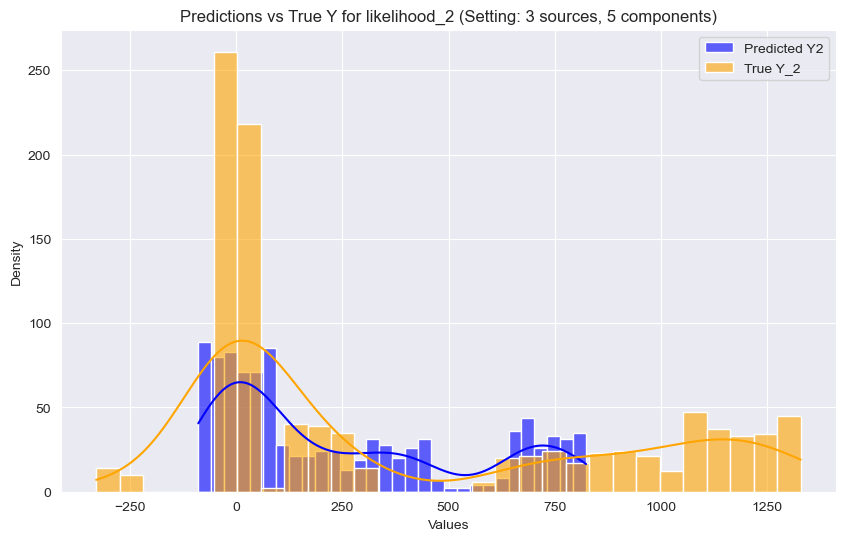


Plotting for setting with 4 sources and 2 components.


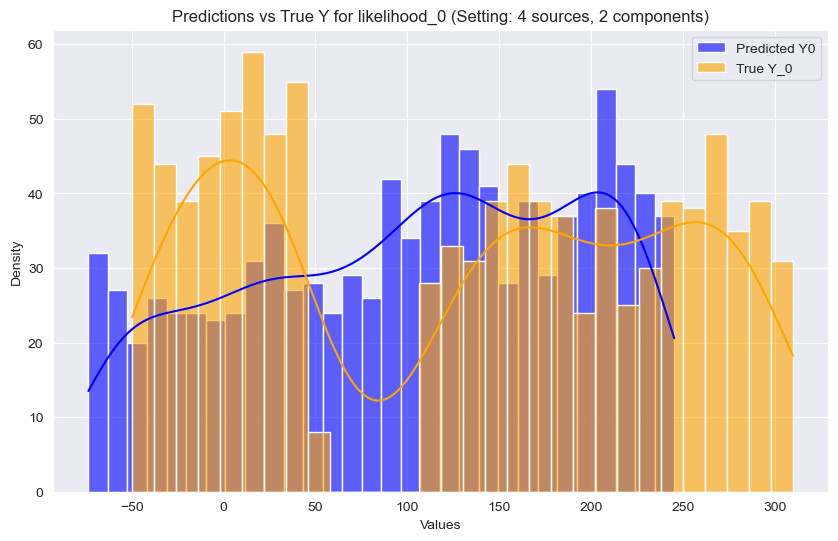

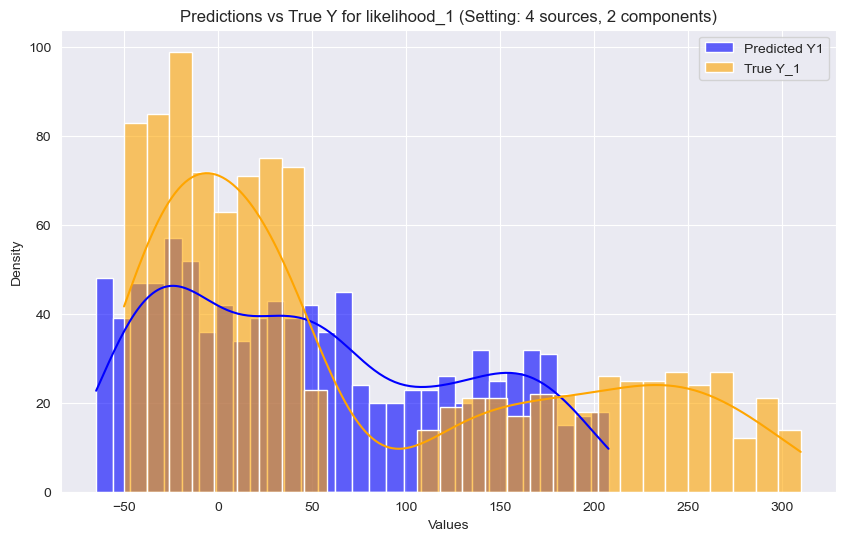

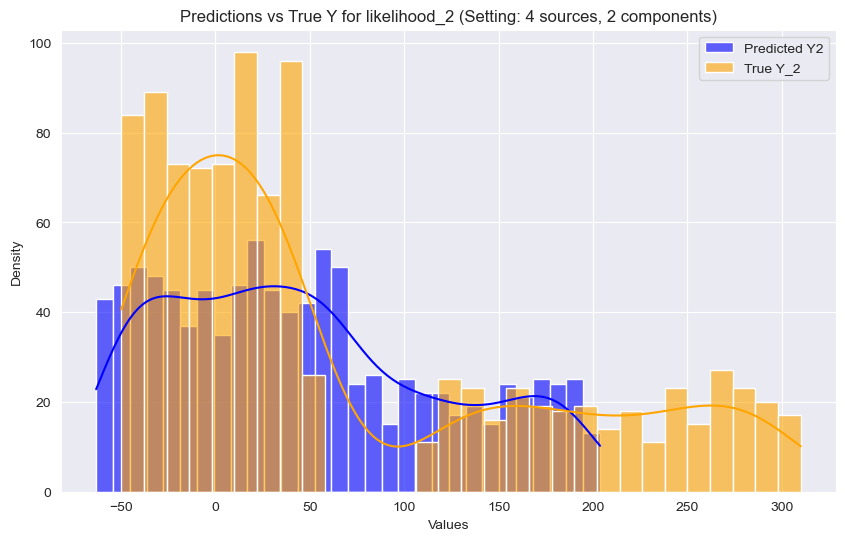

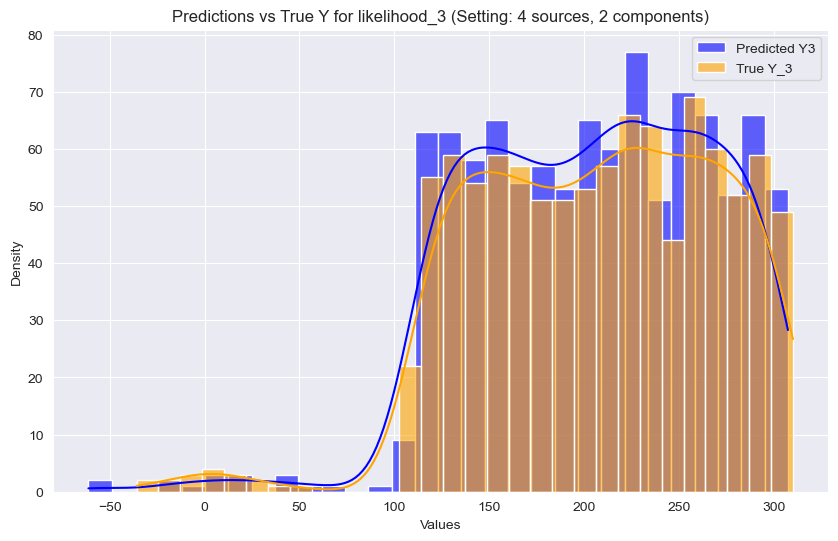


Plotting for setting with 4 sources and 3 components.


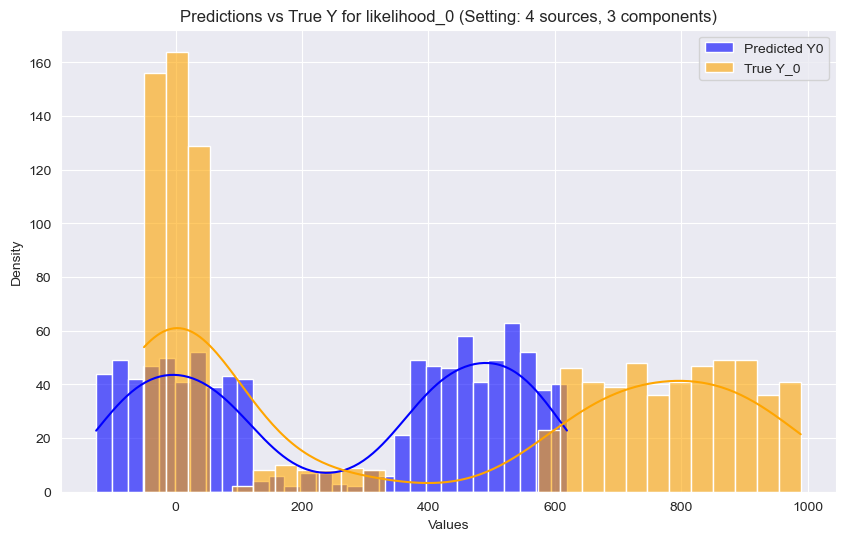

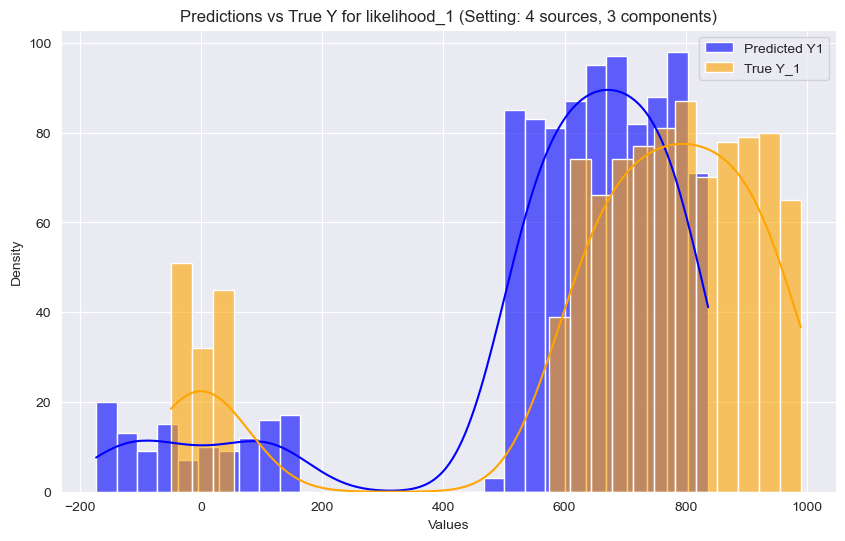

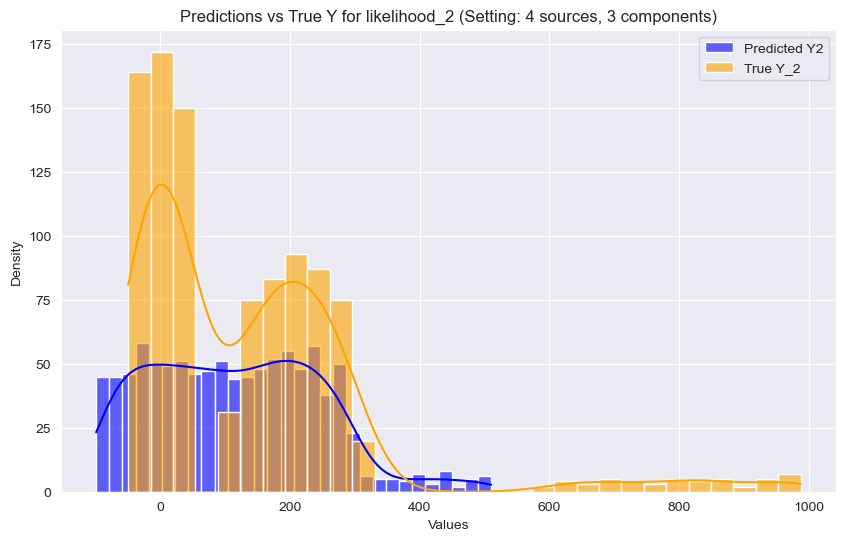

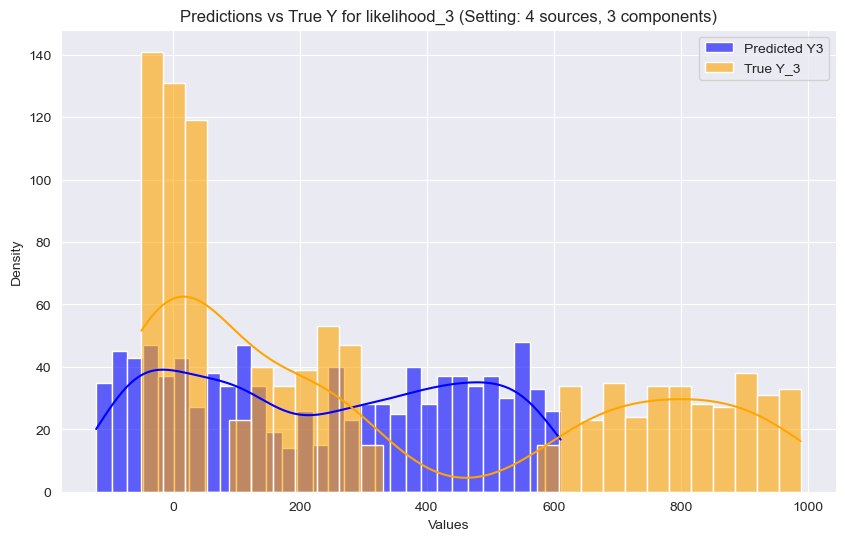


Plotting for setting with 4 sources and 4 components.


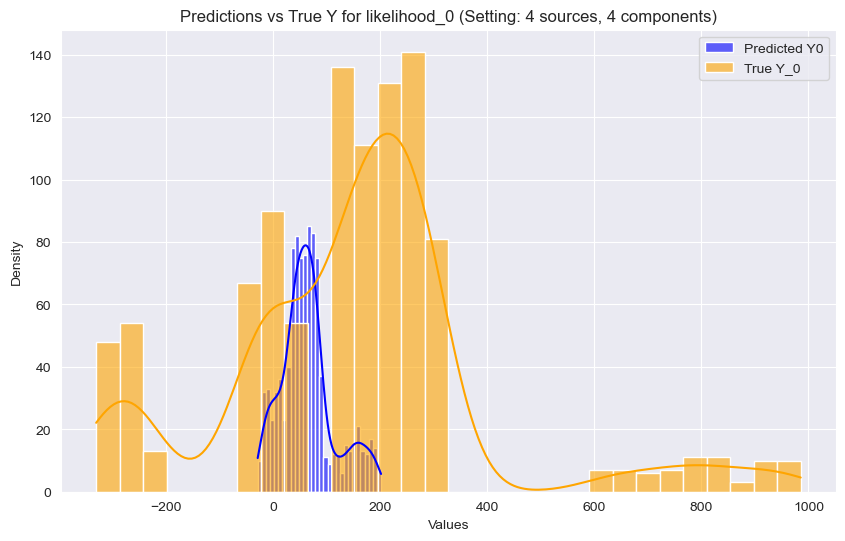

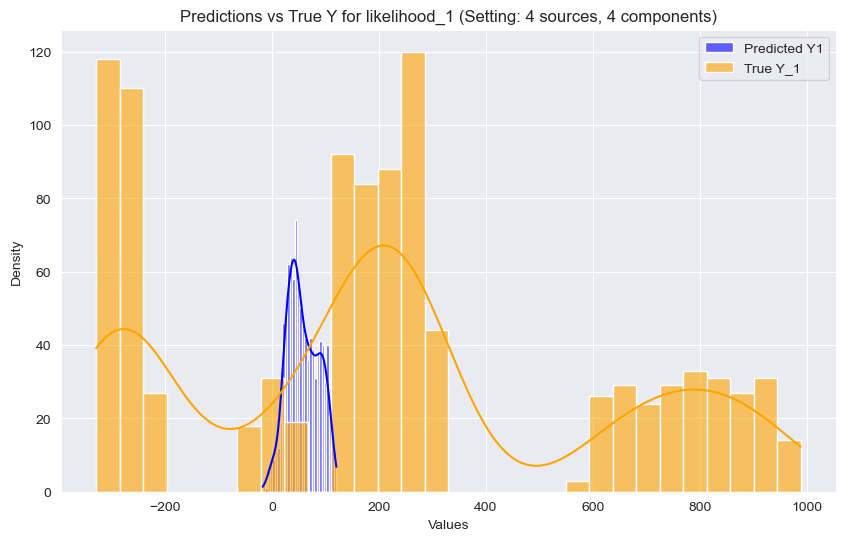

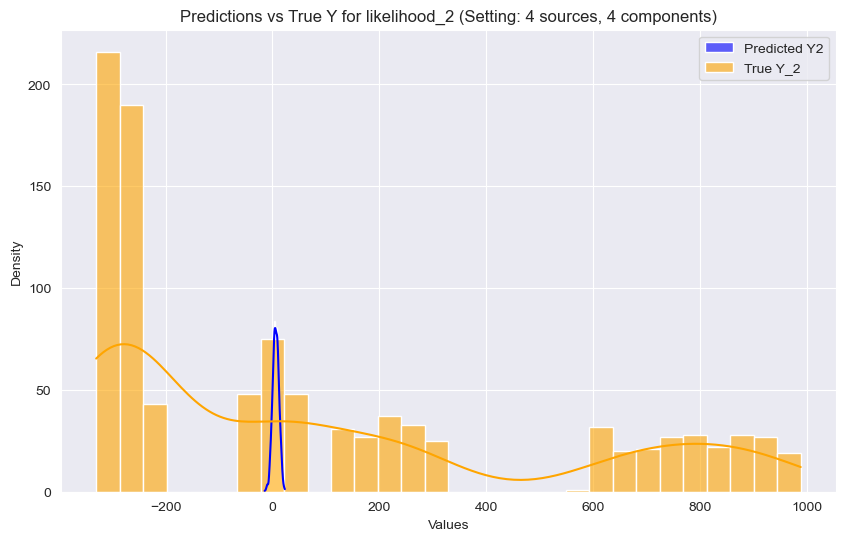

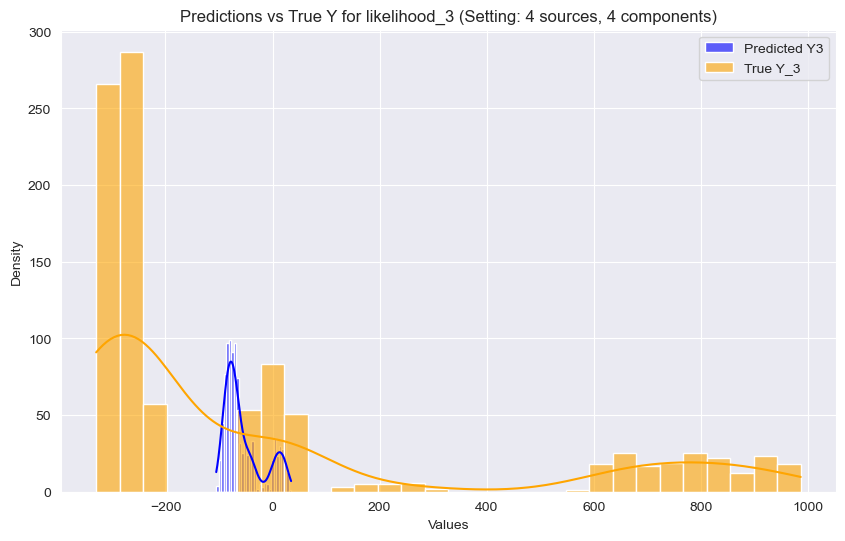


Plotting for setting with 4 sources and 5 components.


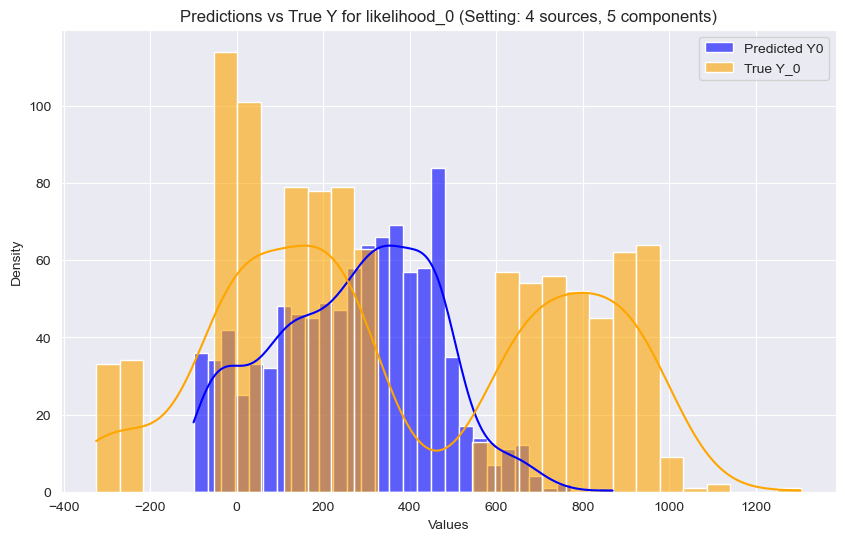

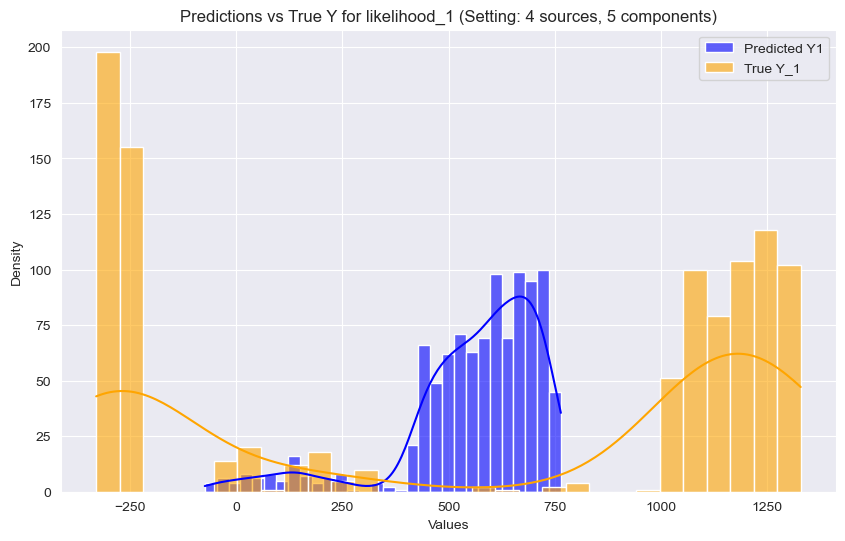

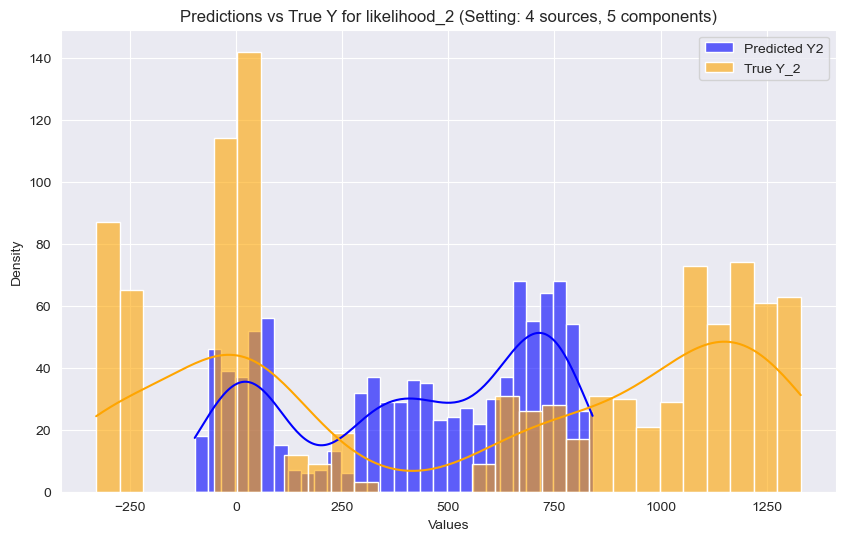

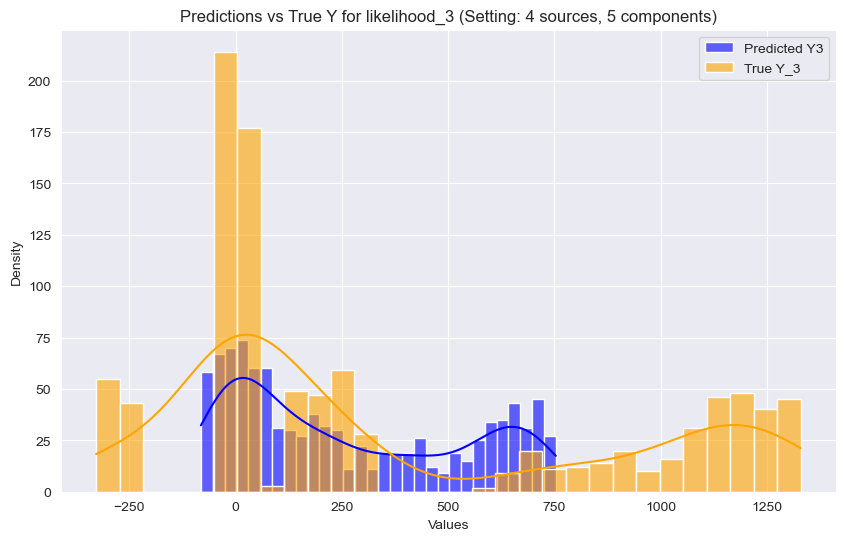


Plotting for setting with 5 sources and 2 components.


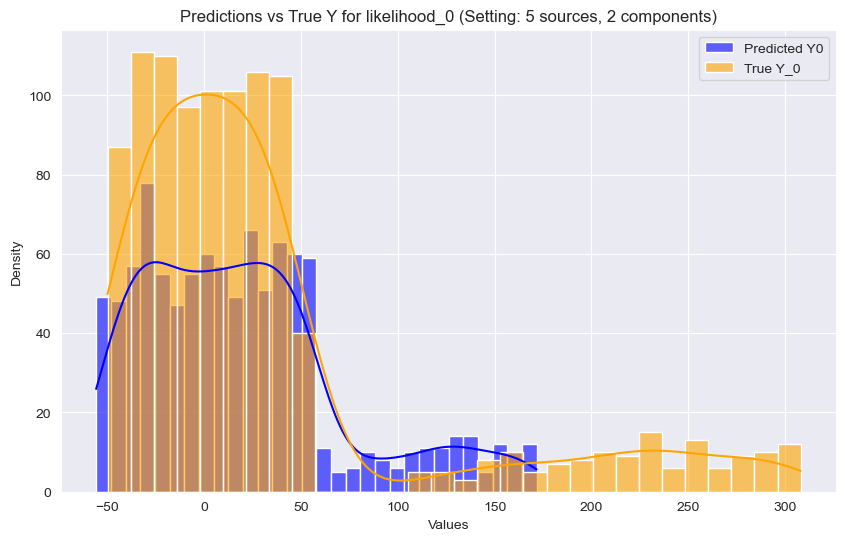

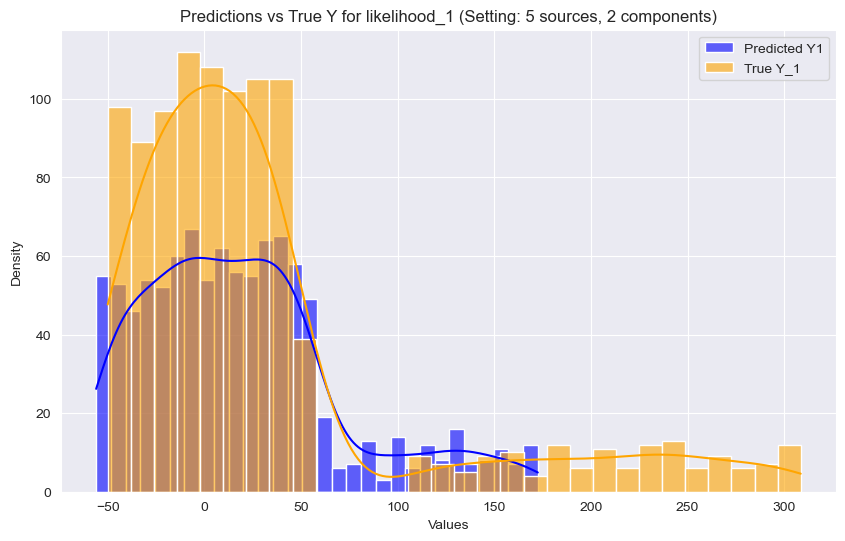

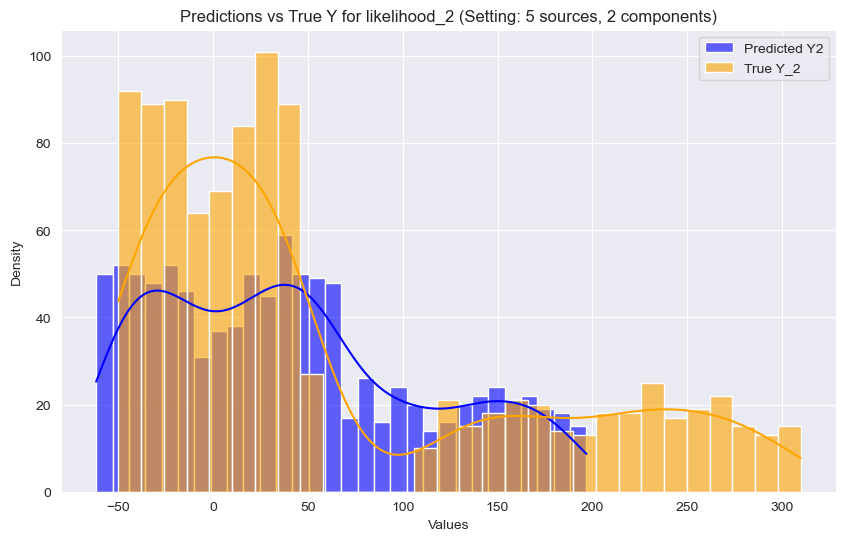

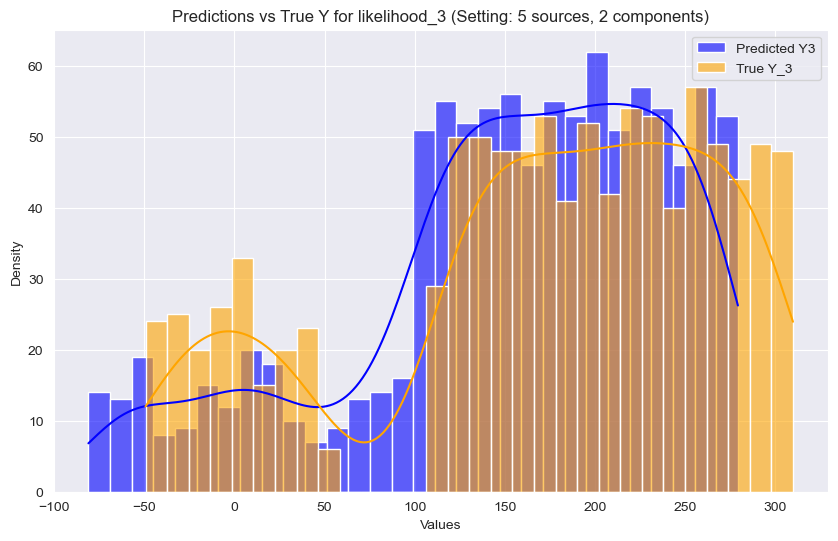

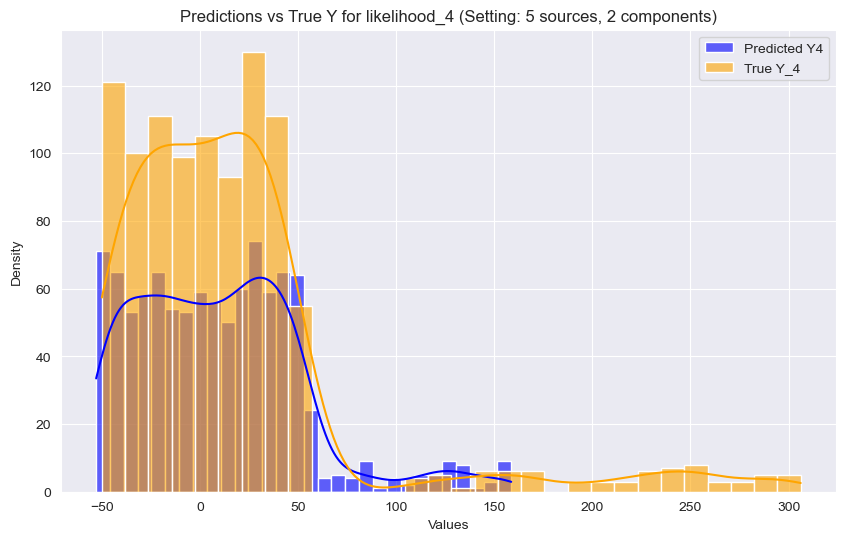


Plotting for setting with 5 sources and 3 components.


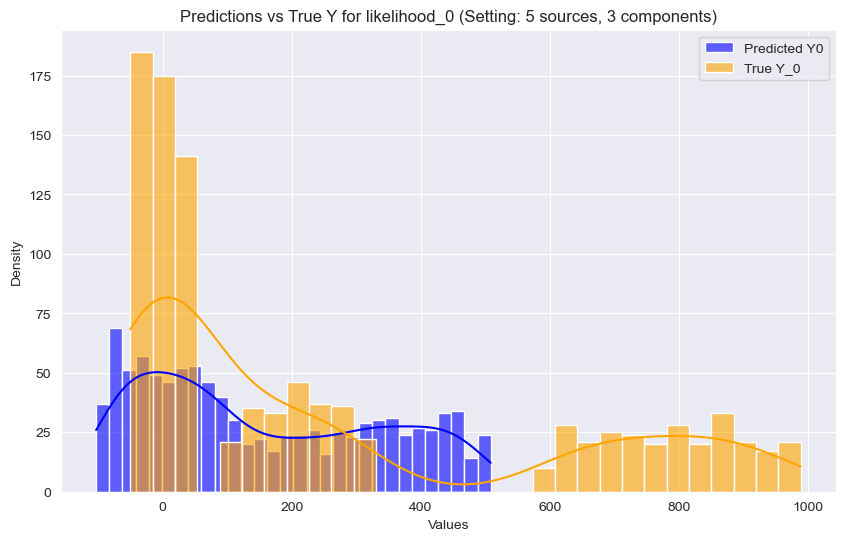

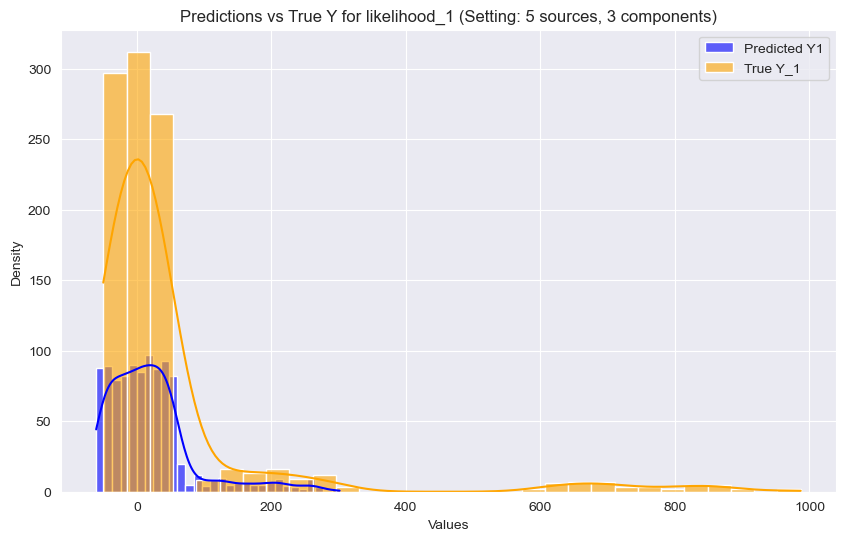

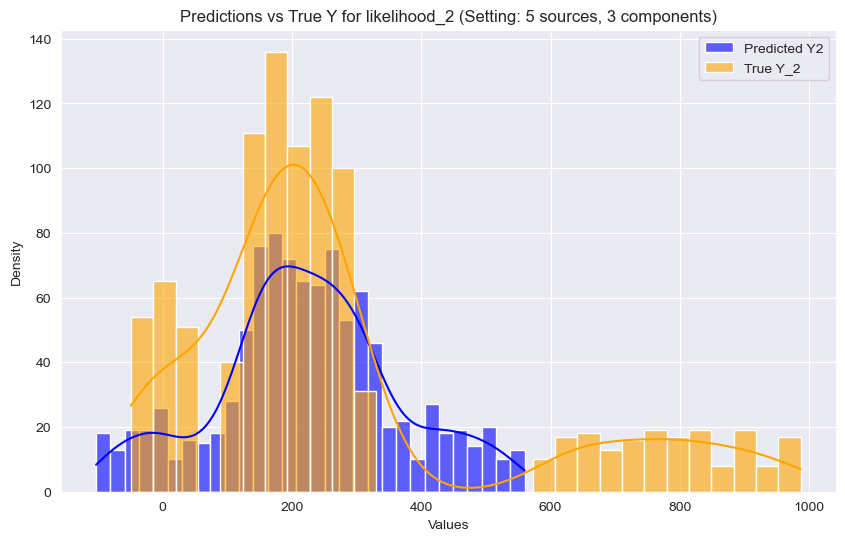

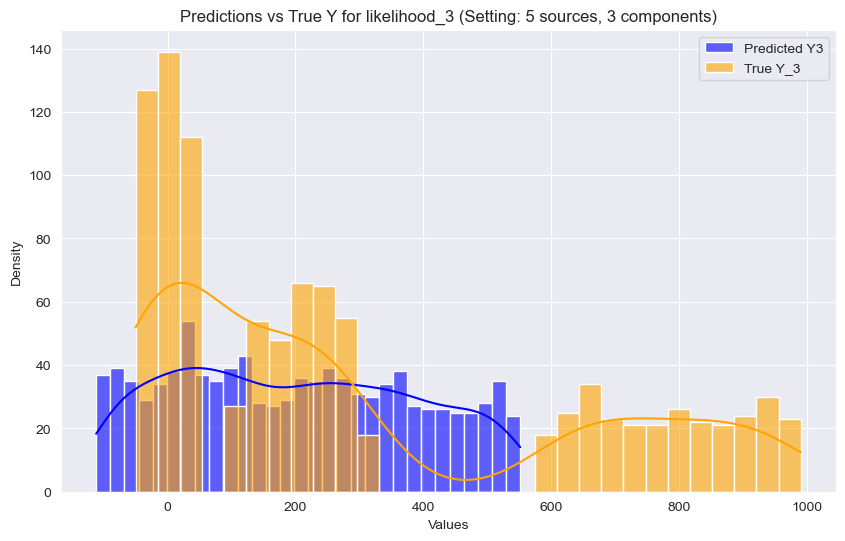

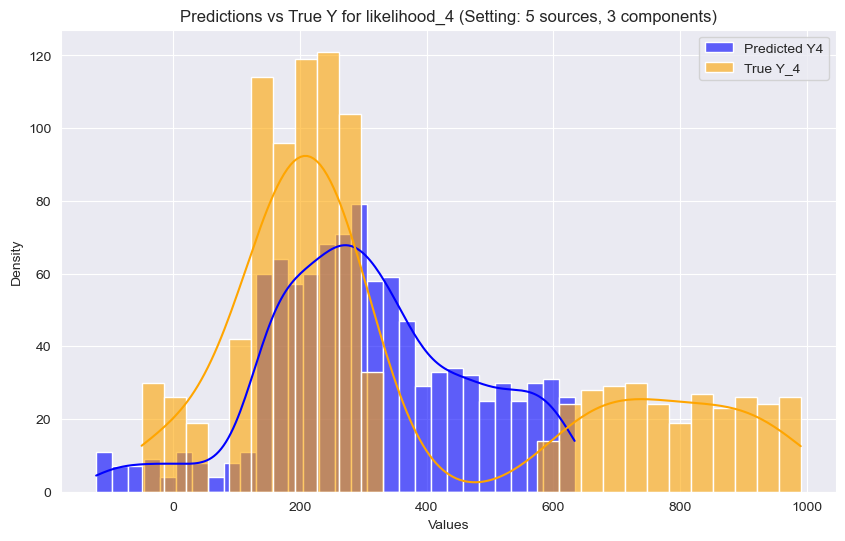


Plotting for setting with 5 sources and 4 components.


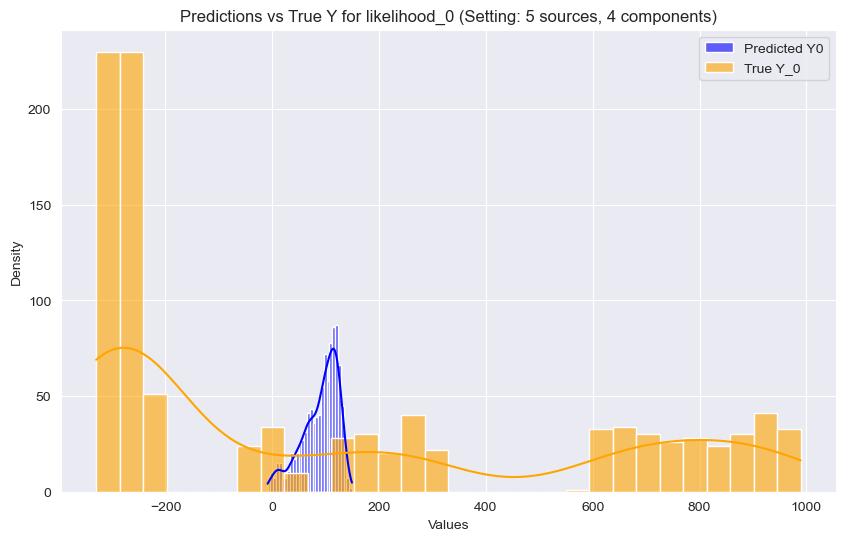

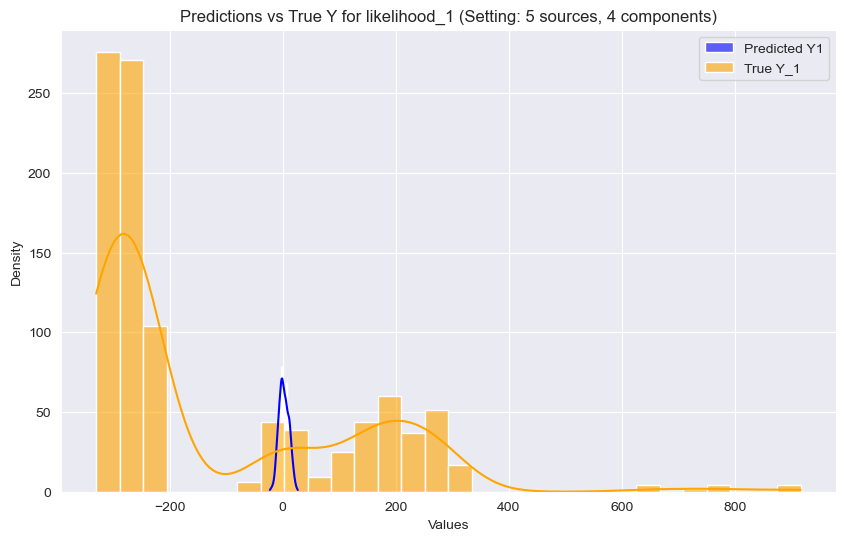

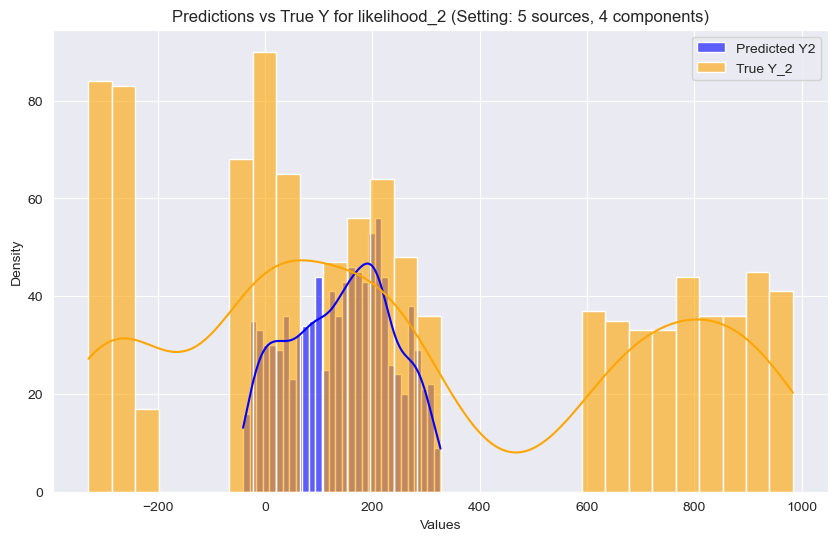

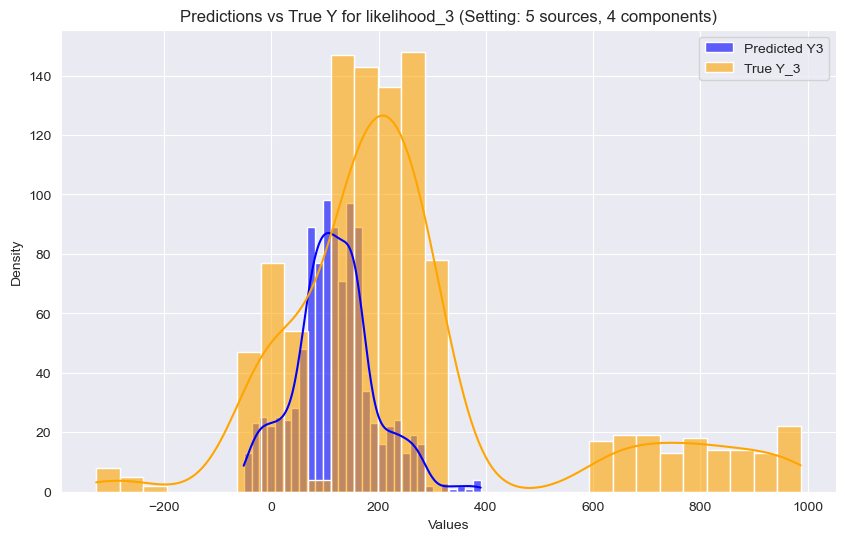

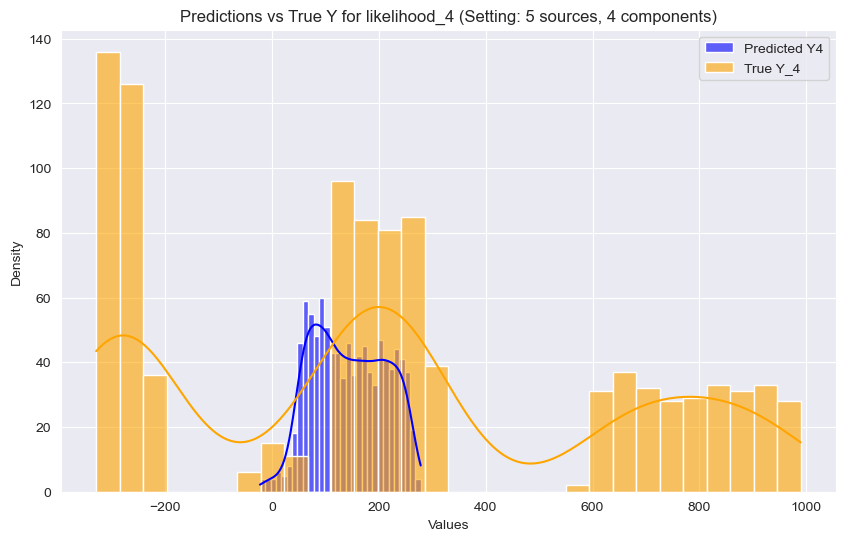


Plotting for setting with 5 sources and 5 components.


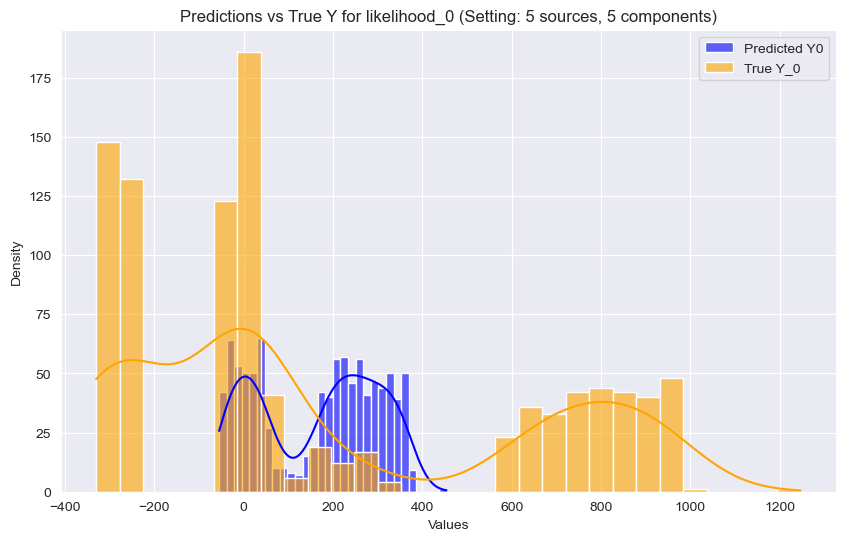

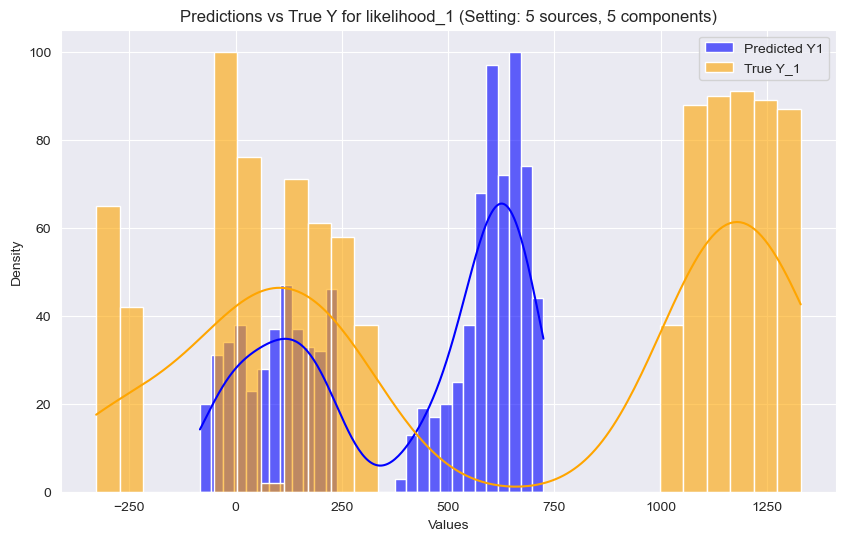

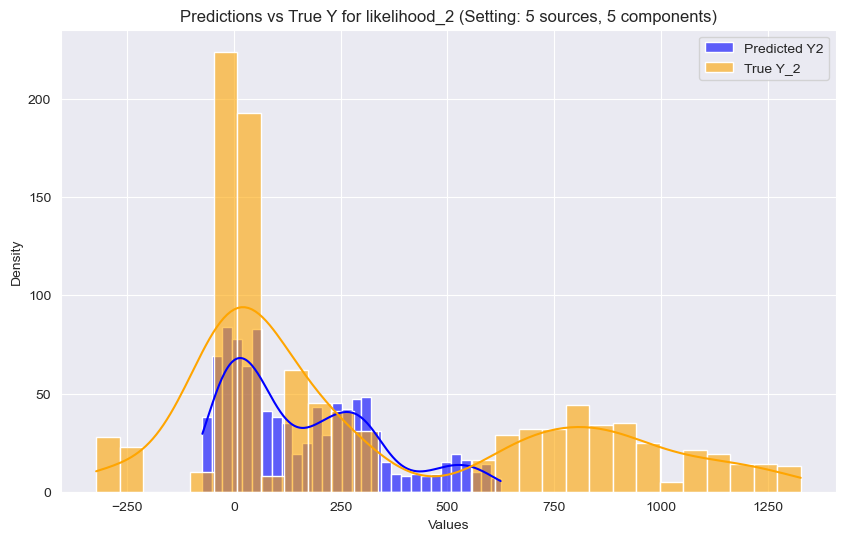

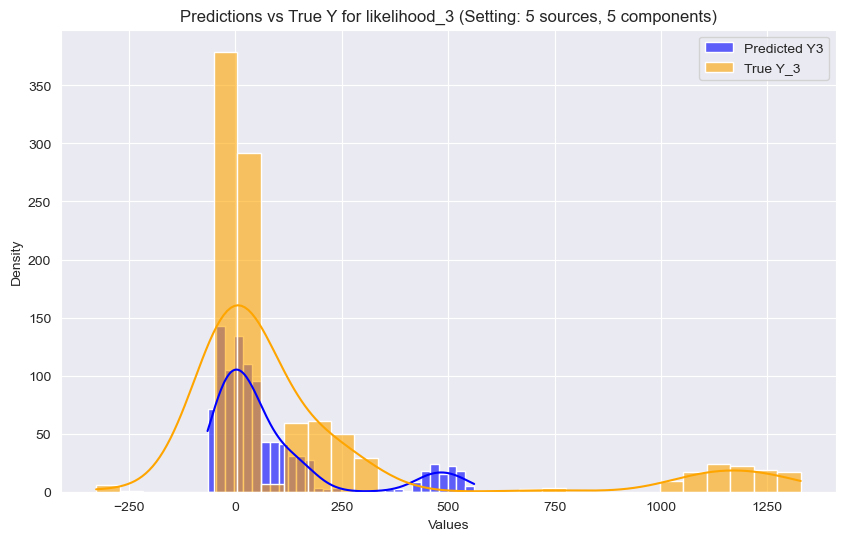

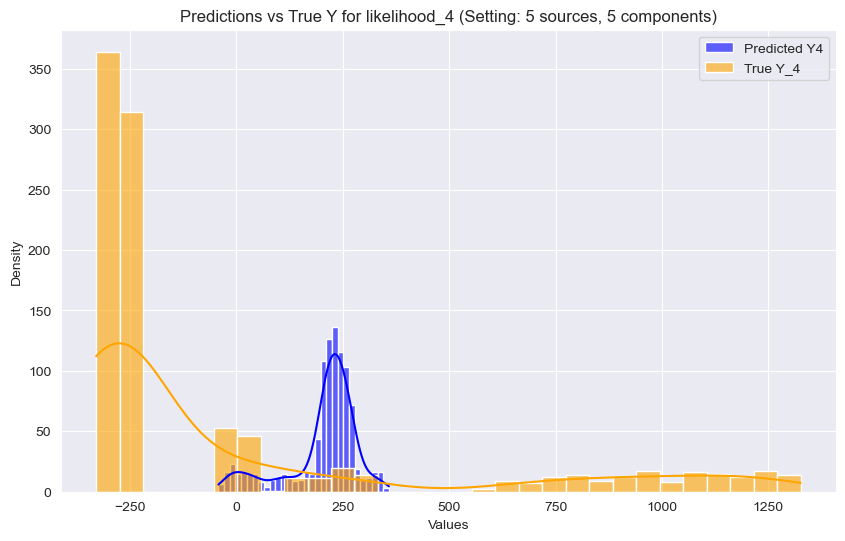

In [34]:
import seaborn as sns

for (ns, nc), (X, Y, proportions) in datasets.items():
    print(f"\nPlotting for setting with {ns} sources and {nc} components.")
    predictions = p_test_pred[(ns, nc)]
    
    for s in range(ns):
        likelihood_name = f"likelihood_{s}"
        true_y = Y[s] if s < len(Y) else None  # Ensure true Y exists for source
        
        if likelihood_name in predictions:
            predicted_values = predictions[likelihood_name]
            
            plt.figure(figsize=(10, 6))
            
            # Plot histogram for predicted values
            sns.histplot(predicted_values, bins=30, kde=True, color="blue", label=f"Predicted Y{s}", alpha=0.6)
            
            # Plot histogram for true Y values if available
            if true_y is not None:
                sns.histplot(true_y, bins=30, kde=True, color="orange", label=f"True Y_{s}", alpha=0.6)
            
            # Add titles and labels
            plt.title(f"Predictions vs True Y for {likelihood_name} (Setting: {ns} sources, {nc} components)")
            plt.xlabel("Values")
            plt.ylabel("Density")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"Warning: Predictions for {likelihood_name} not found.")
